# Predicting Heart Disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data

The original data came from the Cleavland data from the UCI Machine learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3.Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept ,we'll purse the project.

## 4.Features

This is where you'll get different information about each of the features in your data.

**create data dictionary**
1. age - age in years\n",
2. sex - (1 = male; 0 = female)\n",
3. cp - chest pain type\n",
   * 0: Typical angina: chest pain related decrease blood supply to the heart\n",
   * 1: Atypical angina: chest pain not related to heart\n",
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)\n",
   * 3: Asymptomatic: chest pain not showing signs of disease\n",
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern\n",
5. chol - serum cholestoral in mg/dl\n",
    * serum = LDL + HDL + .2 * triglycerides\n",
    * above 200 is cause for concern\n",
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n",
    * '>126' mg/dL signals diabetes\n",
7. restecg - resting electrocardiographic results\n",
    * 0: Nothing to note\n",
    * 1: ST-T Wave abnormality\n",
         * can range from mild symptoms to severe problems\n",
         * signals non-normal heart beat\n",
    * 2: Possible or definite left ventricular hypertrophy\n",
         * Enlarged heart's main pumping chamber\n",
8. thalach - maximum heart rate achieved\n",
9. exang - exercise induced angina (1 = yes; 0 = no)\n",
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more\n",
11. slope - the slope of the peak exercise ST segment\n",
    * 0: Upsloping: better heart rate with excercise (uncommon)\n",
    * 1: Flatsloping: minimal change (typical healthy heart)\n",
    * 2: Downslopins: signs of unhealthy heart\n",
12. ca - number of major vessels (0-3) colored by flourosopy\n",
    * colored vessel means the doctor can see the blood passing through\n",
    * the more blood movement the better (no clots)\n",
13. thal - thalium stress result\n",
    * 1,3: normal\n",
    * 6: fixed defect: used to be defect but ok now\n",
    * 7: reversable defect: no proper blood movement when excercising\n",
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)"

## preparing the tools

we're going to use pandas, matplotlib and numpy for data analysis and manipulation. 

In [8]:
# Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plans to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [12]:
df = pd.read_csv('heart-disease.csv')
df.shape #( rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [17]:
# Lets find out how many of each class there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

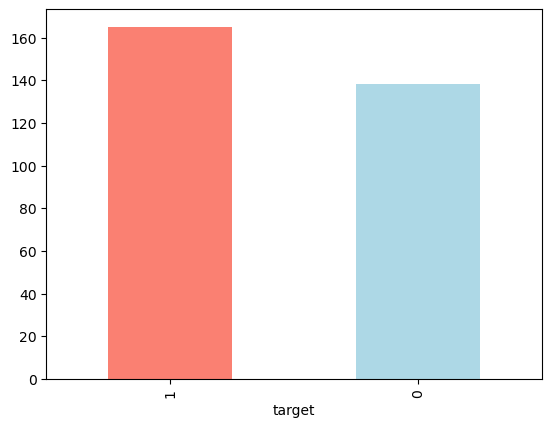

In [21]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [25]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [26]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


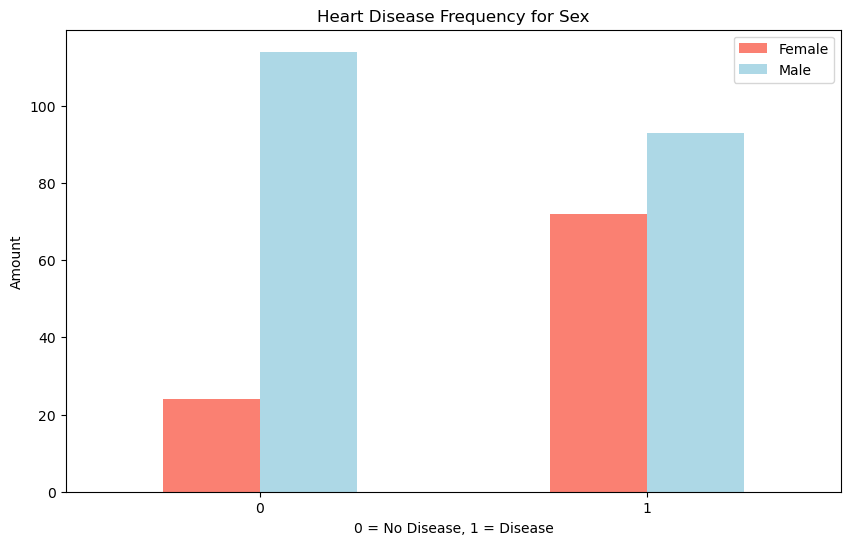

In [31]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                    figsize = (10,6),
                                    color= ['salmon','lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)
plt.show()

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
# thalach - maximum heart rate acheived
df['thalach'].value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

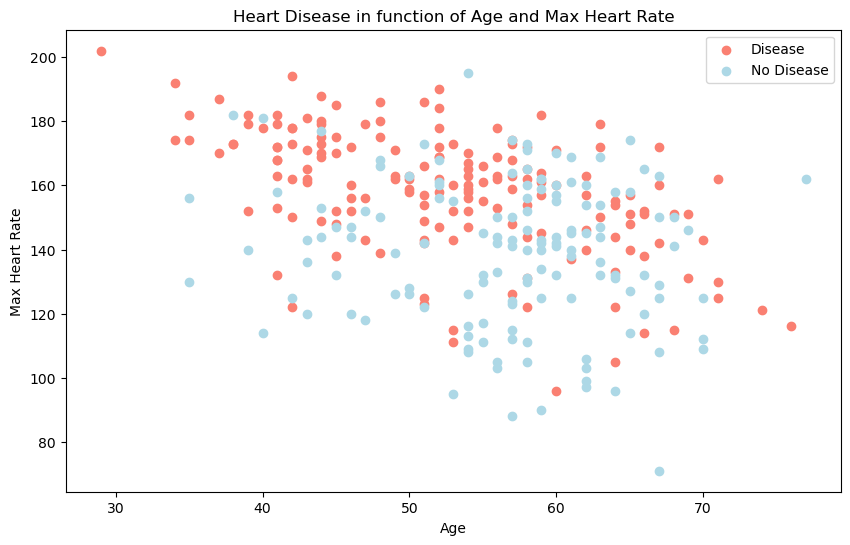

In [41]:
# Creating another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c= 'salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color = 'lightblue')


# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show()

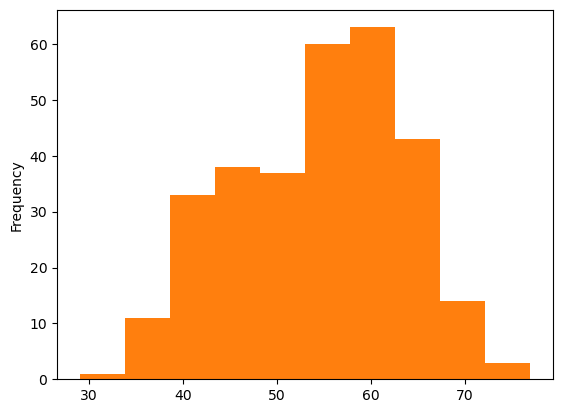

In [43]:
# Check the distribution of the age column with a histogram 

df.age.plot.hist()
plt.show()

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
   - 0:Typical angina: chest pain related decrease blood supply to the heart
   - 1: Atypical angina: chest pain not related to heart
   - 2: Non-anginal pain: typically, esophageal spasms (not heart related)
   - 3: Asymptomatic: chest pain not showing signs of disease

In [44]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


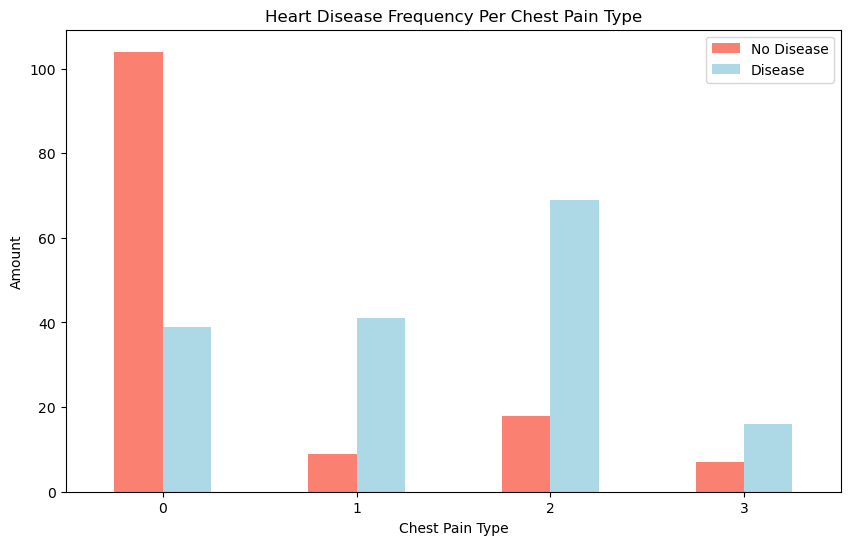

In [45]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color = ['salmon','lightblue'])

# Add some communication 
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


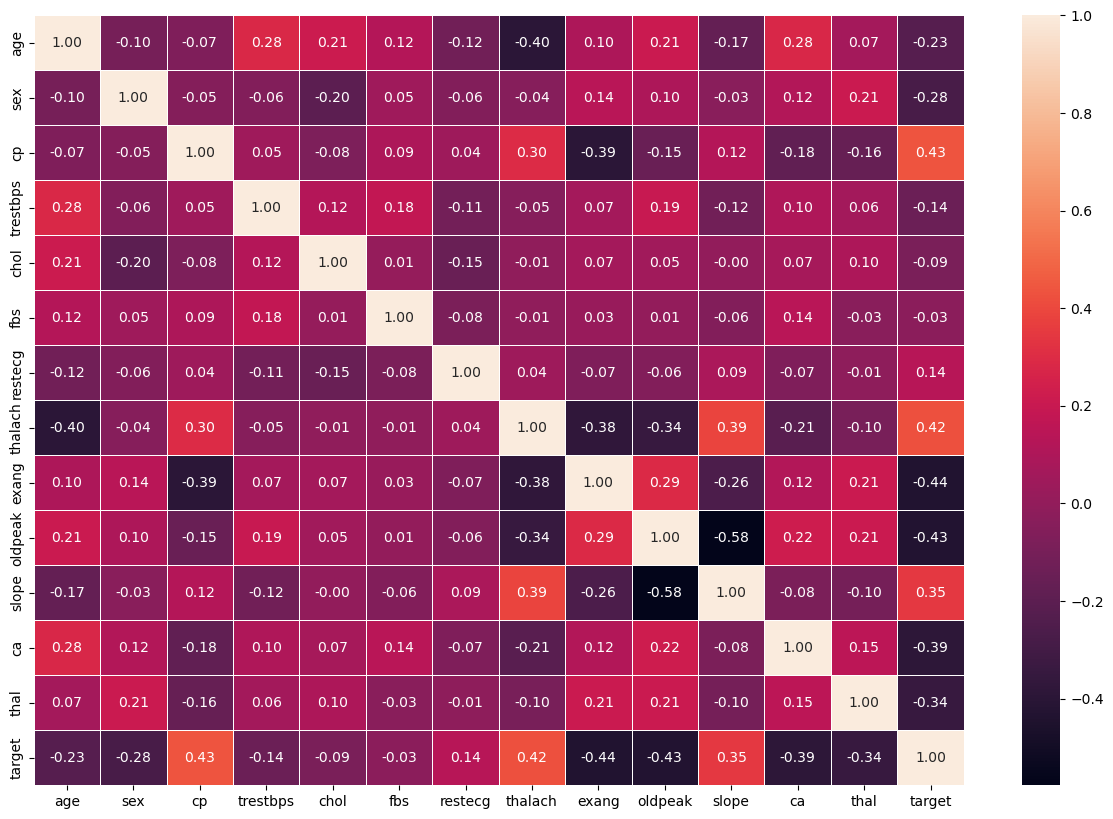

In [52]:
# lets make our correlation matrix a little prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot= True,
                 linewidths=0.5,
                 fmt='.2f')

plt.show()
                 

## 5. Modelling

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
# Split data into x and y
x = df.drop('target', axis= 1)
y = df.target

In [55]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [56]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [58]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Now we've got our date split into training and test sets, its time to build a machine learning model

we'll train it(find the patterns) on the training sets.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classification
3. Random Forest Classifier


In [61]:
# Put models in dictionary 
models= {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different scikit-learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(42)
    # Make a dictionary to keep models scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [62]:
model_scores = fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\G.Guna\desktop\ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

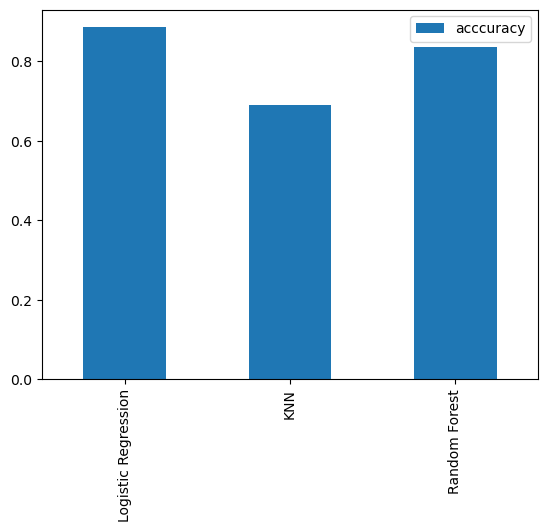

In [68]:
model_compare = pd.DataFrame(model_scores, index=['acccuracy'])
model_compare.T.plot.bar()
plt.show()

Now we've got a baseline model... and we know a model's first prediction aren't always what we should based our next steps off. what should do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning

In [70]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(x_train,y_train)

    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))

    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [72]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [73]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum knn score on the test data: 75.41%


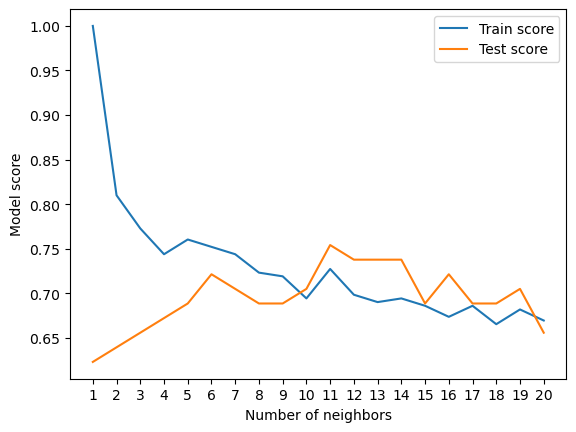

In [75]:
plt.plot(neighbors, train_scores, label= 'Train score')
plt.plot(neighbors, test_scores, label= 'Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f'maximum knn score on the test data: {max(test_scores)*100:.2f}%')
plt.show()

## Hyperparameter Tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [85]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [81]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [82]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [83]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do for RandomForestClassifier()....

In [87]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter= 20,
                           verbose= True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [88]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [90]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [91]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameters Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [93]:
# Different hyperparameters for our LogisticRegression model 

log_reg_grid = {'C':np.logspace(-4,4,30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose= True)
# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)
                

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [94]:
# Check the best parameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [95]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [96]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned machine learning classifier, beyond accuracy 

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [97]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [98]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

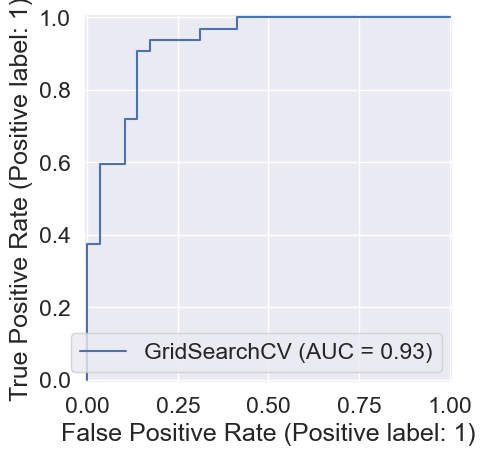

In [124]:
# Plot ROC curve and calculate and calculate AUC metric

RocCurveDisplay.from_estimator(gs_log_reg,x_test, y_test)

plt.show()

In [110]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


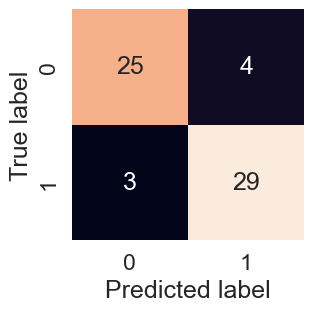

In [115]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot= True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds)
plt.show()

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall, and f1-score

In [125]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation 

We're going to calculate accuracy,precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [268]:
# Check best hyperparameters 
gs_log_reg.best_params_


{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [269]:
# Create a new classifier with best parameters
clf= LogisticRegression(C=0.20433597178569418,
                        solver = 'liblinear')


In [270]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [271]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [272]:
# Cross-validated precision
cv_pre = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring= 'precision')
cv_pre = np.mean(cv_pre)
cv_pre

np.float64(0.8207936507936507)

In [273]:
# Cross-validated recall
cv_rec = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring= 'recall')
cv_rec = np.mean(cv_rec)
cv_rec

np.float64(0.9212121212121213)

In [274]:
# Cross_validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring= 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

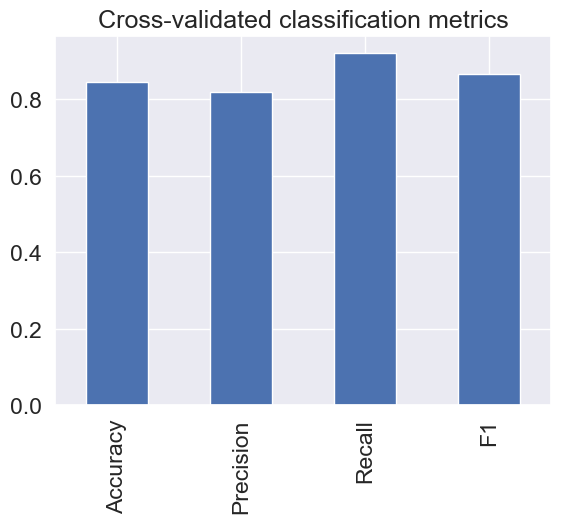

In [142]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision':cv_pre,
                           'Recall': cv_rec,
                           'F1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title= 'Cross-validated classification metrics',
                     legend = False)
plt.show()

### Feature Importance

Feature importance is another as asking, 'which features contributed most to the outcomes of the model and how did they contribute?'

Finding Feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...


In [145]:
# Fit an instance of LogisticRegression 

clf = LogisticRegression(C =0.20433597178569418,
                         solver = 'liblinear')
clf.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.20433597178569418
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [146]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [149]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [148]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672769574500135),
 'sex': np.float64(-0.8604461876509621),
 'cp': np.float64(0.6606705956911073),
 'trestbps': np.float64(-0.011569931563712749),
 'chol': np.float64(-0.0016637424209784567),
 'fbs': np.float64(0.04386123481544026),
 'restecg': np.float64(0.3127581278171948),
 'thalach': np.float64(0.02459361107844528),
 'exang': np.float64(-0.6041306062020464),
 'oldpeak': np.float64(-0.5686283181245352),
 'slope': np.float64(0.4505162370054866),
 'ca': np.float64(-0.6360987949056705),
 'thal': np.float64(-0.6766338344951353)}

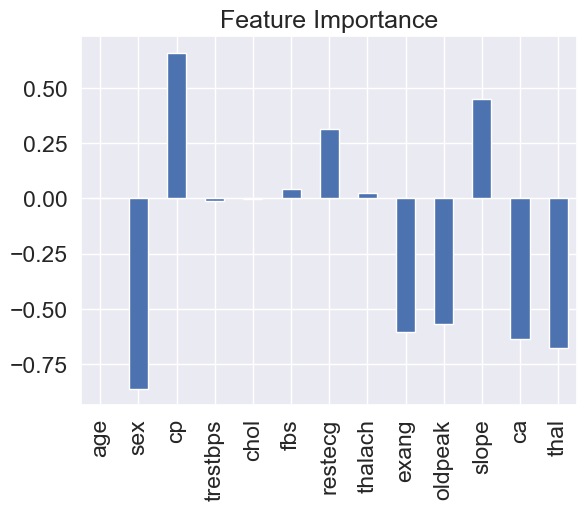

In [151]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)
plt.show()

In [152]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [153]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peek exercise ST segment
* 0: Upsloping: better heart rate with exercise(uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart


### 6.Experimentation

If you haven't hit your evaluation metric yet.. ask yourself..

* Could you collect more data?
* Could you try better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric)
how would you export it and share it with others?

We'll try to use different models like

1. Decision Tree
2. Support Vector Machine (SVM)
3. Naive Bayes
4. CatBoost
5. XGBoost


In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [179]:
# Put models in dictionary 
models= {'Logistic Regression': LogisticRegression(max_iter=1000),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Naive': GaussianNB(),
         'SVM': SVC(),
         'XGBoost':XGBClassifier(),
         'CatBoost':CatBoostClassifier()
        }

# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different scikit-learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(42)
    # Make a dictionary to keep models scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [180]:
model_scores = fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 19.5ms	remaining: 19.5s
1:	learn: 0.6846994	total: 21ms	remaining: 10.5s
2:	learn: 0.6804470	total: 23.5ms	remaining: 7.82s
3:	learn: 0.6762242	total: 27.3ms	remaining: 6.8s
4:	learn: 0.6716784	total: 30.4ms	remaining: 6.06s
5:	learn: 0.6672808	total: 32.8ms	remaining: 5.44s
6:	learn: 0.6639958	total: 35.7ms	remaining: 5.06s
7:	learn: 0.6601980	total: 37.7ms	remaining: 4.68s
8:	learn: 0.6563766	total: 39.2ms	remaining: 4.32s
9:	learn: 0.6525103	total: 41.1ms	remaining: 4.07s
10:	learn: 0.6483670	total: 42.6ms	remaining: 3.83s
11:	learn: 0.6448827	total: 44.1ms	remaining: 3.63s
12:	learn: 0.6412767	total: 47.2ms	remaining: 3.58s
13:	learn: 0.6374286	total: 50.6ms	remaining: 3.56s
14:	learn: 0.6335427	total: 53.8ms	remaining: 3.54s
15:	learn: 0.6288052	total: 55.7ms	remaining: 3.42s
16:	learn: 0.6250489	total: 58.6ms	remaining: 3.39s
17:	learn: 0.6209495	total: 60.5ms	remaining: 3.3s
18:	learn: 0.6181899	total: 62.4ms	remaining: 3.

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Decision Tree': 0.8524590163934426,
 'Naive': 0.8688524590163934,
 'SVM': 0.7049180327868853,
 'XGBoost': 0.819672131147541,
 'CatBoost': np.float64(0.8360655737704918)}

### Model Comparision

* 'Logistic Regression': 0.8852459016393442,
* 'KNN': 0.6885245901639344,
* 'Random Forest': 0.8360655737704918,
* 'Decision Tree': 0.8524590163934426,
* 'Naive': 0.8688524590163934,
* 'SVM': 0.7049180327868853,
* 'XGBoost': 0.819672131147541,
* 'CatBoost': np.float64(0.8360655737704918)

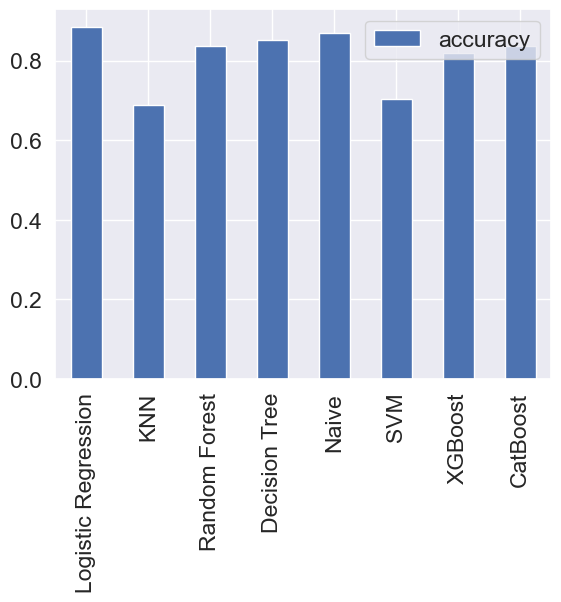

In [182]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.show()

### Hyperparameter tuning with GridCV

we're going to tune:
* DecisionTreeClassifier()
* GaussianNB()
* SupportVectorClassifier()
* XGBoostClassifier()
* catBoostClassifier()

In [190]:
# create a hyperparameter grid for XGBoost
xg_grid =  {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}
# Setup grid hyperparameter search for Xgbclassifier
gs_xg = GridSearchCV(XGBClassifier(),
                     param_grid=xg_grid,
                     cv=5,
                     scoring= 'accuracy',
                     verbose=1)


gs_xg.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [191]:
gs_xg.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}

In [192]:
gs_xg.score(x_test, y_test)

0.8032786885245902

In [193]:
# creat a hyperparameter grid for CatBoost
cat_grid = param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

# setup grid hyperparameter search for catboost classifier
gs_cat = GridSearchCV(CatBoostClassifier(),
                     param_grid=xg_grid,
                     cv=5,
                     scoring= 'accuracy',
                     verbose=1)

gs_cat.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6898670	total: 18.9ms	remaining: 924ms
1:	learn: 0.6861765	total: 19.3ms	remaining: 463ms
2:	learn: 0.6822251	total: 19.6ms	remaining: 306ms
3:	learn: 0.6796584	total: 19.9ms	remaining: 228ms
4:	learn: 0.6772243	total: 20.2ms	remaining: 182ms
5:	learn: 0.6748656	total: 20.6ms	remaining: 151ms
6:	learn: 0.6724254	total: 21.2ms	remaining: 130ms
7:	learn: 0.6692954	total: 21.6ms	remaining: 114ms
8:	learn: 0.6657521	total: 22ms	remaining: 100ms
9:	learn: 0.6628613	total: 22.4ms	remaining: 89.7ms
10:	learn: 0.6605612	total: 22.8ms	remaining: 81ms
11:	learn: 0.6574818	total: 23.3ms	remaining: 73.7ms
12:	learn: 0.6553979	total: 23.6ms	remaining: 67.2ms
13:	learn: 0.6528475	total: 24.1ms	remaining: 61.9ms
14:	learn: 0.6499696	total: 24.6ms	remaining: 57.5ms
15:	learn: 0.6464964	total: 25.1ms	remaining: 53.3ms
16:	learn: 0.6441316	total: 25.5ms	remaining: 49.5ms
17:	learn: 0.6410789	total: 25.9ms	remaining: 46.1ms
18:	lea

,estimator,<catboost.cor...0017B1924E8B0>
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [195]:
gs_cat.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}

In [196]:
gs_cat.score(x_test, y_test)

0.8852459016393442

In [198]:
# creat a hyperparameter grid for Support vector classifier
svc_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 
# setup grid hyperparameter search for Support vector classifier
gs_svc = GridSearchCV(SVC(),
                     param_grid=svc_grid,
                     cv=5,
                     refit=True,
                     verbose=3)
gs_svc.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [200]:
gs_svc.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [199]:
gs_svc.score(x_test, y_test)

0.8360655737704918

In [208]:
# creat a hyperparameter grid for Naivebayes
nb_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
# setup grid hyperparameter search for Naivebayes
gs_nb = GridSearchCV(GaussianNB(),
                     param_grid=nb_grid,
                     cv=5,
                     verbose=3)
gs_nb.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.776 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.857 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.771 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.812 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.729 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.776 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.857 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.771 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.812 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.729 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.776 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;,

,estimator,GaussianNB()
,param_grid,"{'var_smoothing': [1e-09, 1e-08, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,priors,None


In [210]:
gs_nb.best_params_

{'var_smoothing': 1e-09}

In [211]:
gs_nb.score(x_test, y_test)

0.8688524590163934

In [204]:
# creat a hyperparameter grid for DecisionTree Classifier
dtc_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# setup grid hyperparameter search for DecisionTree Classifier
gs_dtc = GridSearchCV(DecisionTreeClassifier(),
                     param_grid=dtc_grid,
                     cv=5,
                     verbose=3)
gs_dtc.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.755 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.694 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.708 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.667 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [206]:
gs_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}

In [207]:
gs_dtc.score(x_test, y_test)

0.8360655737704918

### Before Hyperparameter Tuning

* 'Logistic Regression': 0.8852459016393442,
* 'KNN': 0.6885245901639344,
* 'Random Forest': 0.8360655737704918,
* 'Decision Tree': 0.8524590163934426,
* 'Naive': 0.8688524590163934,
* 'SVM': 0.7049180327868853,
* 'XGBoost': 0.819672131147541,
* 'CatBoost': np.float64(0.8360655737704918)

In [213]:
model_compare

,Logistic Regression,KNN,Random Forest,Decision Tree,Naive,SVM,XGBoost,CatBoost
accuracy,0.885246,0.688525,0.836066,0.852459,0.868852,0.704918,0.819672,0.836066


In [231]:
model_compare_afthyp = {'Logistic Regression': gs_log_reg.score(x_test,y_test),
                        'Random Forest':rs_rf.score(x_test, y_test),
                        'Decision Tree':gs_dtc.score(x_test,y_test),
                        'Naive bayes': gs_nb.score(x_test,y_test),
                        'SVC': gs_svc.score(x_test,y_test),
                        "XGBoost": gs_xg.score(x_test,y_test),
                        'CatBoost': gs_cat.score(x_test,y_test)}
model_compare_afthyp

{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8688524590163934,
 'Decision Tree': 0.8360655737704918,
 'Naive bayes': 0.8688524590163934,
 'SVC': 0.8360655737704918,
 'XGBoost': 0.8032786885245902,
 'CatBoost': 0.8852459016393442}

In [232]:
model_compare_1 = pd.DataFrame(model_compare_afthyp, index =['accuracy'])
model_compare_1

,Logistic Regression,Random Forest,Decision Tree,Naive bayes,SVC,XGBoost,CatBoost
accuracy,0.885246,0.868852,0.836066,0.868852,0.836066,0.803279,0.885246


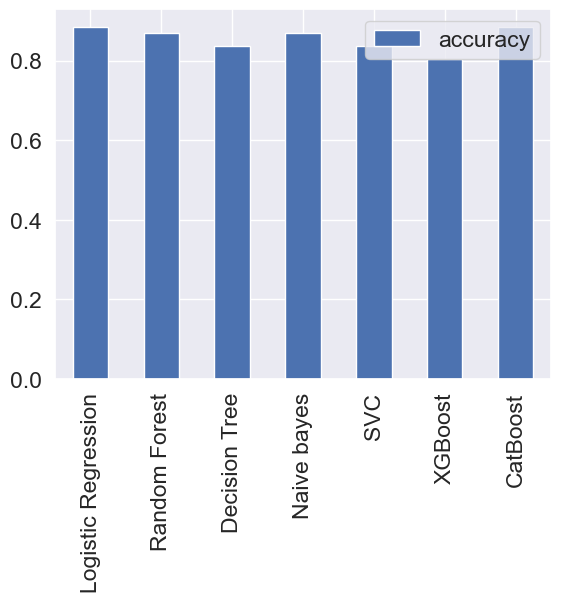

In [233]:
model_compare_1.T.plot.bar()
plt.show()

### Evaluating our tuned machine learning classifier beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

from the above classifiers we got best accuracy for logistic regression and cat boost.
We've tuned logistic regression classifier beyond accuracy above
Now will focus on CatBoostCLassifier.


In [235]:
y_preds_1 = gs_cat.predict(x_test)
y_preds_1

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [236]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

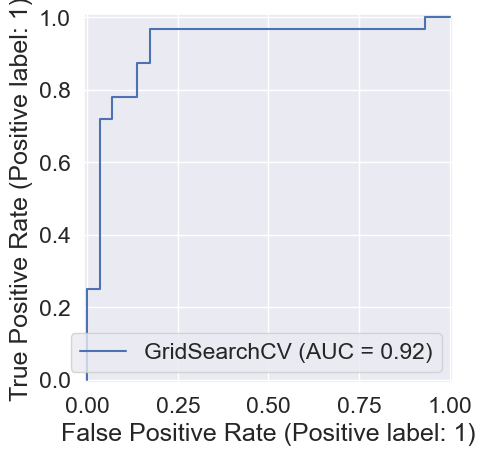

In [240]:
RocCurveDisplay.from_estimator(gs_cat, x_test, y_test)
plt.show()

In [246]:
confusion_matrix(y_test,y_preds_1)

array([[24,  5],
       [ 2, 30]])

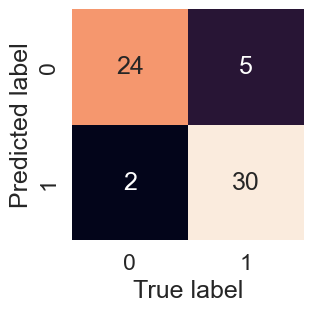

In [245]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds_1):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_1),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
   
plot_conf_mat(y_test, y_preds_1)
plt.show()

In [249]:
print(classification_report(y_test, y_preds_1))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



## Calculate Evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [251]:
gs_cat.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}

In [255]:
# create a new classifier with best parameters
clf_1 = CatBoostClassifier(learning_rate=0.01,
                          max_depth=4,
                          n_estimators=50)

In [257]:
# Cross-validated accuracy
cv_acc_1 = cross_val_score(clf_1,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc_1

0:	learn: 0.6901050	total: 678us	remaining: 33.2ms
1:	learn: 0.6872483	total: 1.56ms	remaining: 37.6ms
2:	learn: 0.6843849	total: 2.21ms	remaining: 34.6ms
3:	learn: 0.6812899	total: 2.87ms	remaining: 33ms
4:	learn: 0.6783180	total: 3.54ms	remaining: 31.8ms
5:	learn: 0.6751966	total: 4.19ms	remaining: 30.7ms
6:	learn: 0.6724000	total: 4.88ms	remaining: 30ms
7:	learn: 0.6692120	total: 5.53ms	remaining: 29ms
8:	learn: 0.6664778	total: 6.16ms	remaining: 28.1ms
9:	learn: 0.6635218	total: 6.79ms	remaining: 27.1ms
10:	learn: 0.6606252	total: 7.52ms	remaining: 26.7ms
11:	learn: 0.6581319	total: 8.17ms	remaining: 25.9ms
12:	learn: 0.6555178	total: 8.8ms	remaining: 25ms
13:	learn: 0.6525475	total: 9.35ms	remaining: 24ms
14:	learn: 0.6500681	total: 9.84ms	remaining: 23ms
15:	learn: 0.6474541	total: 10.5ms	remaining: 22.3ms
16:	learn: 0.6450365	total: 11.1ms	remaining: 21.6ms
17:	learn: 0.6425826	total: 11.8ms	remaining: 20.9ms
18:	learn: 0.6397766	total: 12.2ms	remaining: 19.9ms
19:	learn: 0.6374

array([0.85245902, 0.8852459 , 0.81967213, 0.8       , 0.76666667])

In [258]:
cv_acc_1 = np.mean(cv_acc_1)
cv_acc_1

np.float64(0.8248087431693989)

In [261]:
# Cross-validated precision
cv_precision_1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision_1=np.mean(cv_precision_1)
cv_precision_1

np.float64(0.8207936507936507)

In [264]:
# Cross-validated Recall
cv_Recall_1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_Recall_1=np.mean(cv_Recall_1)
cv_Recall_1

np.float64(0.9212121212121213)

In [267]:
# Cross-validated F1 score
cv_F1score_1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_F1score_1=np.mean(cv_F1score_1)
cv_F1score_1

np.float64(0.8673007976269721)

In [277]:
cv_score_log_reg = {
    'accuracy':cv_acc,
    'precision':cv_pre,
    'recall':cv_rec,
    'f1-score':cv_f1}

In [278]:
cv_score_log_reg

{'accuracy': np.float64(0.8446994535519124),
 'precision': np.float64(0.8207936507936507),
 'recall': np.float64(0.9212121212121213),
 'f1-score': np.float64(0.8673007976269721)}

In [279]:
cv_score_catboost = {
    'accuracy':cv_acc_1,
    'precision':cv_precision_1,
    'recall':cv_Recall_1,
    'f1-score':cv_F1score_1}

In [280]:
cv_score_catboost

{'accuracy': np.float64(0.8248087431693989),
 'precision': np.float64(0.8207936507936507),
 'recall': np.float64(0.9212121212121213),
 'f1-score': np.float64(0.8673007976269721)}

### Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [283]:
# Fit an instance of LogisticRegression
clf_1= CatBoostClassifier(learning_rate=0.01,
                          max_depth=4,
                          n_estimators=50)

clf_1.fit(x_train, y_train);

0:	learn: 0.6902882	total: 1ms	remaining: 49.2ms
1:	learn: 0.6874782	total: 1.72ms	remaining: 41.3ms
2:	learn: 0.6849108	total: 2.54ms	remaining: 39.9ms
3:	learn: 0.6817610	total: 3.28ms	remaining: 37.7ms
4:	learn: 0.6788303	total: 3.75ms	remaining: 33.7ms
5:	learn: 0.6756853	total: 4.2ms	remaining: 30.8ms
6:	learn: 0.6728180	total: 4.67ms	remaining: 28.7ms
7:	learn: 0.6702551	total: 5.34ms	remaining: 28ms
8:	learn: 0.6679509	total: 6.03ms	remaining: 27.5ms
9:	learn: 0.6647047	total: 6.67ms	remaining: 26.7ms
10:	learn: 0.6621619	total: 7.28ms	remaining: 25.8ms
11:	learn: 0.6595579	total: 7.88ms	remaining: 25ms
12:	learn: 0.6569646	total: 8.45ms	remaining: 24.1ms
13:	learn: 0.6538890	total: 9ms	remaining: 23.1ms
14:	learn: 0.6507485	total: 9.52ms	remaining: 22.2ms
15:	learn: 0.6487078	total: 10.1ms	remaining: 21.4ms
16:	learn: 0.6465765	total: 11.3ms	remaining: 22ms
17:	learn: 0.6442669	total: 11.8ms	remaining: 21ms
18:	learn: 0.6420085	total: 12.3ms	remaining: 20ms
19:	learn: 0.6392477

In [286]:
importances = clf_1.get_feature_importance()

In [288]:
# Assuming you have a pandas DataFrame
for name, score in zip(x_train.columns, importances):
    print(f"{name}: {score:.2f}")

age: 0.78
sex: 1.27
cp: 17.92
trestbps: 1.80
chol: 1.12
fbs: 0.16
restecg: 0.20
thalach: 1.77
exang: 7.94
oldpeak: 4.33
slope: 10.32
ca: 31.88
thal: 20.52


<Figure size 1000x600 with 0 Axes>

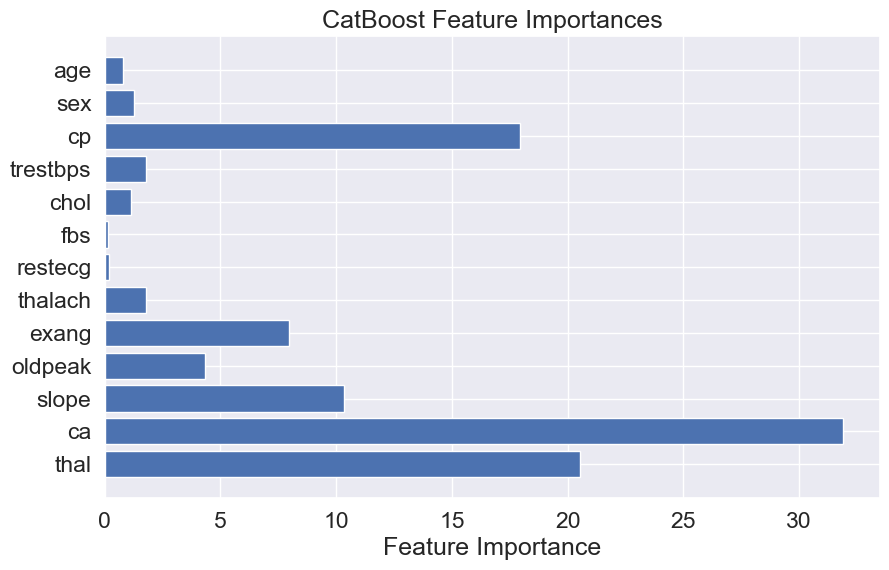

In [290]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(x_train.columns, importances)
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importances")
plt.gca().invert_yaxis()
plt.show()

C:\Users\G.Guna\AppData\Local\Temp\ipykernel_3288\1511837250.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, x_test)


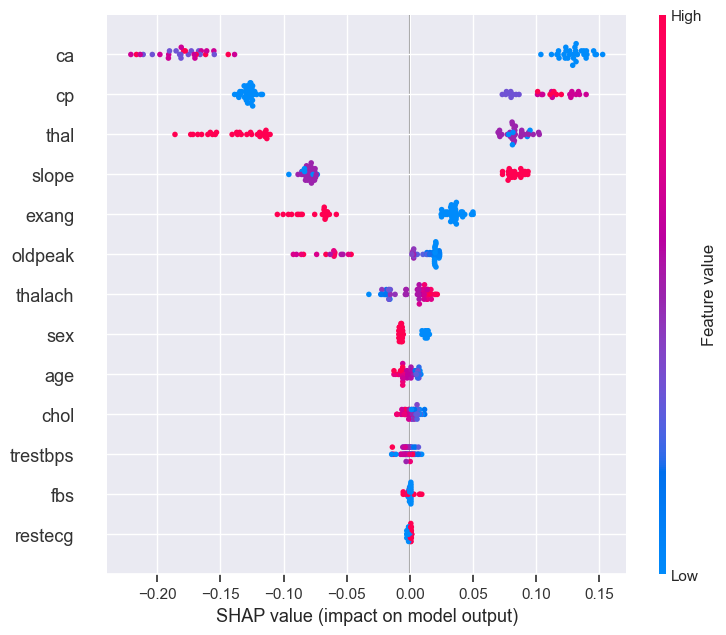

In [294]:
import shap

explainer = shap.TreeExplainer(clf_1)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)
